# Clasificación de número con el dataset MNIST usanado redes convolucionales

En este cuadreno vamos a implementar una convolucional para clasificar imágenes de cifras. Para entrenar el modelo usaremos el dataset MNIST (https://www.tensorflow.org/datasets/catalog/mnist?hl=es).

## 1. Importamos librerías

---



In [1]:
import tensorflow as tf
import keras
from keras.layers import Dense, Flatten, Input, Conv2D, MaxPooling2D, Dropout
from keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np
import random

2025-07-28 11:40:26.498955: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-28 11:40:26.690724: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-07-28 11:40:26.690788: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-07-28 11:40:26.691890: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-07-28 11:40:26.778332: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-28 11:40:26.780648: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

## 2. Preprocesado de datos

---



El primer paso es preprocesar los datos. Para ello, cargamos el conjunto de datos de dígitos MNIST de la biblioteca de conjuntos de datos Keras, lo dividimos en conjuntos de entrenamiento y de prueba, hacemos un reshape de las imágenes y codificamos las etiquetas.

In [2]:
# Cargamos el dataset MNIST.
# El dataset MNIST tiene 60,000 imágenes de entrenamiento y 10,000 imagenes de test de dígitos escritos a mano.
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
# Normalizamos los valores de píxeles al intervalo [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convertimos las etiquetas a formato one-hot encoding
y_train = keras.utils.to_categorical(y_train, 10)  # 10 clases (0-9)
y_test = keras.utils.to_categorical(y_test, 10)

Further, the following are the shapes of each matrix, as well as a visualization of a random MNIST digit.

In [4]:
# Show the shapes of the data.
print("Imágenes de entrenamiento:", X_train.shape)
print("Imágenes de test:", X_test.shape)
print("Etiquetas de entrenamiento:", y_train.shape)
print("Etiquetas de test:", y_test.shape)

Imágenes de entrenamiento: (60000, 28, 28)
Imágenes de test: (10000, 28, 28)
Etiquetas de entrenamiento: (60000, 10)
Etiquetas de test: (10000, 10)


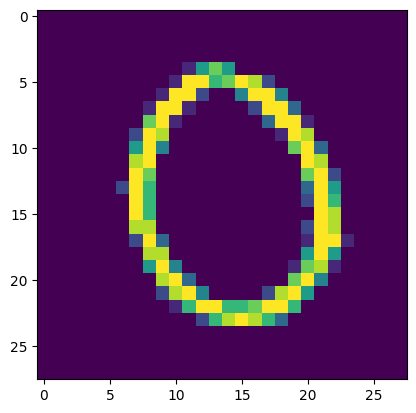

In [5]:
# Show a sample MNIST digit.
index = random.randint(1, 60000)
plt.imshow(X_train[index])
plt.show()

## 3. Red neuronal
---



### 3.1. Definimos el modelo

Vamos de definir un modelo secuencial de dos capas fully connected (dense layers)

In [6]:
num_classes = 10
input_shape = (28, 28,1)

# Define el modelo
model = Sequential(
    [
        Input(shape=input_shape),
        Conv2D(32, kernel_size=(3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, kernel_size=(3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dropout(0.5),
        Dense(num_classes, activation="softmax"),
    ]
)


In [7]:
# Mostramos información del modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

Una vez definido el modelo lo compilamos usando el optimizador Adam and y como función de pérdida (loss) categorrical cross-entropy.




In [8]:
# Compilamos the model.
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### 3.2. Entrenamos el modelo

Para entrenar el modelo debemos definie el número de épocas (epochs) y y tamaño de batch.


In [9]:
# Define the parameters.
num_epochs = 10
batch_size = 32

# Train the model.
history = model.fit(X_train,
                      y_train,
                      epochs=num_epochs,
                      batch_size=batch_size,
                      validation_data=(X_test, y_test))

Epoch 1/10


2025-07-28 11:40:30.221172: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 18s 9ms/step - loss: 0.2131 - accuracy: 0.9345 - val_loss: 0.0589 - val_accuracy: 0.9818
Epoch 2/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0801 - accuracy: 0.9758 - val_loss: 0.0464 - val_accuracy: 0.9846
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0632 - accuracy: 0.9805 - val_loss: 0.0391 - val_accuracy: 0.9874
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0526 - accuracy: 0.9834 - val_loss: 0.0321 - val_accuracy: 0.9892
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0462 - accuracy: 0.9855 - val_loss: 0.0272 - val_accuracy: 0.9907
Epoch 6/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0432 - accuracy: 0.9856 - val_loss: 0.0323 - val_accuracy: 0.9891
Epoch 7/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0375 - accuracy: 0.9879 - val_loss: 0.0295 - val_accuracy: 0.9

### 3.3. Mostramos las métricas

Mostramos la precisióh del modelo (accuracy) usando el conjunto de datos de test.


In [10]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('Test Accuracy:', test_accuracy)
print('Test Loss:', test_loss)

313/313 [==============================] - 1s 3ms/step - loss: 0.0266 - accuracy: 0.9913
Test Accuracy: 0.9912999868392944
Test Loss: 0.02660517208278179


Guardamos las métricas para cada época y dibujamos la pérdida y la precicion de del modelo.

In [11]:
# Guardamos las métricas.
metrics = history.history

Pintamos las curvas de precisión y pérdida.

In [12]:
# Guardamos los valores de la pérdida
training_loss_list = metrics['loss']
test_loss_list = metrics['val_loss']

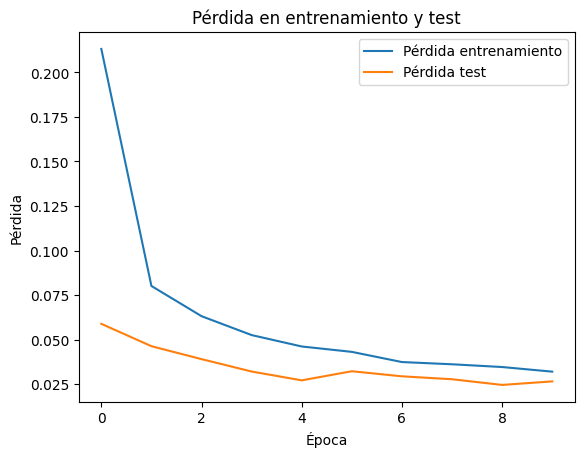

In [13]:
# Pintamos los valores
x = np.arange(0, num_epochs, 1)
plt.title('Pérdida en entrenamiento y test')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.plot(x, training_loss_list, label='Pérdida entrenamiento')
plt.plot(x, test_loss_list, label='Pérdida test')
plt.legend()
plt.show()

In [14]:
train_accuracy_list = metrics['accuracy']
test_accuracy_list = metrics['val_accuracy']

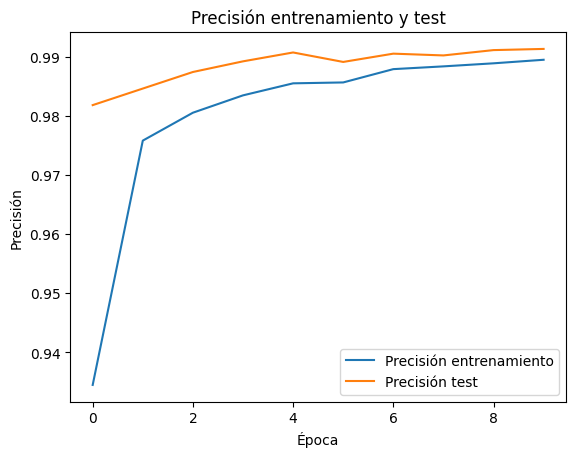

In [15]:
plt.title('Precisión entrenamiento y test')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.plot(x, train_accuracy_list, label='Precisión entrenamiento')
plt.plot(x, test_accuracy_list, label='Precisión test')
plt.legend()
plt.show()

## 4. Probamos el modelo haciendo inferencia

---



Once our model is trained, we can use it to make predictions. To do this, we first use our test set to predict the classes.

In [16]:
# Hacemos una predicción usando el modelo que hemos entrenado.
predictions = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


Elegimos una imagen aleatoria y su etiqueta para ver si la predicción es correcta.

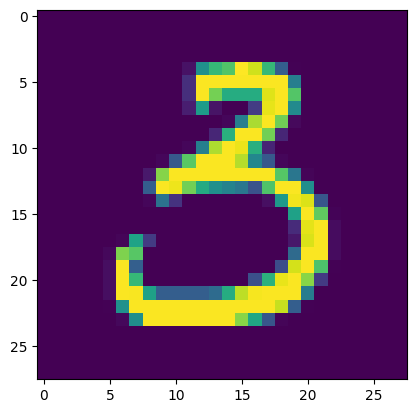

In [17]:
# Seeleccionamos una imagen del conjunto de test de forma aletoria
index = random.randint(1, 10000)

# Mostramos la imagen
plt.imshow(X_test[index])
plt.show()

In [18]:
print("Predicción:", np.argmax(predictions[index]))

Predicción: 3


## 5. Cuantización y Creación del .zip

---


In [22]:
from typing import Generator

n_iter=10

def get_representative_dataset() -> Generator:
    """A function that returns a representative dataset generator for numpy data."""
    dataset = X_train  # numpy array, shape (N, H, W, C)

    def representative_dataset() -> Generator:
        for i in range(n_iter):
            # Devuelve un batch con forma (1, H, W, C)
            yield [dataset[i:i+1]]
    return representative_dataset


# Create a representative dataset generator
representative_dataset_gen = get_representative_dataset()

In [20]:
import model_compression_toolkit as mct
from model_compression_toolkit.core import QuantizationErrorMethod

# Specify the IMX500-v1 target platform capability (TPC)
tpc = mct.get_target_platform_capabilities("tensorflow", 'imx500', target_platform_version='v1')

# Set the following quantization configurations:
# Choose the desired QuantizationErrorMethod for the quantization parameters search.
# Enable weights bias correction induced by quantization.
# Enable shift negative corrections for improving 'signed' non-linear functions quantization (such as swish, prelu, etc.)
# Set the threshold to filter outliers with z_score of 16.
q_config = mct.core.QuantizationConfig(activation_error_method=QuantizationErrorMethod.MSE,
                                       weights_error_method=QuantizationErrorMethod.MSE,
                                       weights_bias_correction=True,
                                       shift_negative_activation_correction=True,
                                       z_threshold=16)

ptq_config = mct.core.CoreConfig(quantization_config=q_config)

In [ ]:
import model_compression_toolkit as mct


quantized_model, quantization_info = mct.ptq.keras_post_training_quantization(
    in_model=model,
    representative_data_gen=representative_dataset_gen,
    core_config=ptq_config,
    target_platform_capabilities=tpc)


quantized_model.save("clasificacion-rps-quant.keras")

representative_data_gen generates a batch size of 1 which can be slow for optimization: consider increasing the batch size


representative_data_gen generates a batch size of 1 which can be slow for optimization: consider increasing the batch size


Statistics Collection: 10it [00:00, 180.60it/s]



Running quantization parameters search. This process might take some time, depending on the model size and the selected quantization methods.



Calculating quantization parameters: 100%|██████████| 11/11 [00:00<00:00, 41.07it/s]


Weights_memory: 34720.0, Activation_memory: 21632.0, Total_memory: 56352.0, BOPS: 587505664

Please run your accuracy evaluation on the exported quantized model to verify it's accuracy.
Checkout the FAQ and Troubleshooting pages for resolving common issues and improving the quantized model accuracy:
FAQ: https://github.com/sony/model_optimization/tree/main/FAQ.md
Quantization Troubleshooting: https://github.com/sony/model_optimization/tree/main/quantization_troubleshooting.md


In [26]:

MODEL_CLASSIFICATION = 'clasificacion-rps.keras'

!imxconv-tf -i {MODEL_CLASSIFICATION} -o converted

"""
# Expected output from converter:
dnnParams.xml		   mobilenet-quant-rps_MemoryReport.json
mobilenet-quant-rps.pbtxt  packerOut.zip
"""

!ls converted
assert "packerOut.zip", f"Converted file not found"

2025-07-28 11:46:16,157 INFO : Running version 3.16.1 [/home/daniel/.venv_tf2/lib/python3.11/site-packages/uni/common/logger.py:179]
2025-07-28 11:46:16,157 INFO : Converting clasificacion-rps.keras [/home/daniel/.venv_tf2/lib/python3.11/site-packages/uni/common/logger.py:179]
2025-07-28 11:46:16.393440: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-28 11:46:16.430096: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-07-28 11:46:16.430149: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-07-28 11:46:16.430186: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for